Source : https://github.com/AlexVonEinzbern/Schrodingers-Equation-Solution-by-Neural-Network-NN-

In [1]:
import autograd.numpy as np
from autograd import grad
import autograd.numpy.random as npr

from matplotlib import pyplot as plt

In [2]:
nx = 20
dx = 1. / nx
n = 1
k = n*np.pi
A = np.sqrt(2)

In [3]:
def f(x, psy, dpsy):
    '''
        d2(psy)/dx2 = f(x, dpsy/dx, psy)
        This is f() function on the right
    '''
    return -(k**2)*psy


def psy_analytic(x):
    '''
        Analytical solution of current problem
    '''
    return A * np.sin(k*x)

In [4]:
x_space = np.linspace(0, 1, nx)
y_space = psy_analytic(x_space)

In [5]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))


def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def psy_trial(xi, net_out):
    '''
    Using Initial Conditions psy(0) = 0, d(psy)/dx (0) = Pi * A 
    '''
    return (np.pi*A)*xi + (xi**2)*net_out

In [6]:
psy_grad = grad(psy_trial)
psy_grad2 = grad(psy_grad)

In [7]:
def loss_function(W, x):
    loss_sum = 0.

    for xi in x:
        net_out = neural_network(W, xi)[0][0]

        net_out_d = grad(neural_network_x)(xi)
        net_out_dd = grad(grad(neural_network_x))(xi)

        psy_t = psy_trial(xi, net_out)

        gradient_of_trial = psy_grad(xi, net_out)
        second_gradient_of_trial = psy_grad2(xi, net_out)

        func = f(xi, psy_t, gradient_of_trial)  # right part function

        err_sqr = (second_gradient_of_trial - func) ** 2
        loss_sum += err_sqr

    return loss_sum

In [8]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

for i in range(50):
    loss_grad =  grad(loss_function)(W, x_space)

    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

print (loss_function(W, x_space))
res = [psy_trial(xi, neural_network(W, xi)[0][0]) for xi in x_space]

163.73217665069186


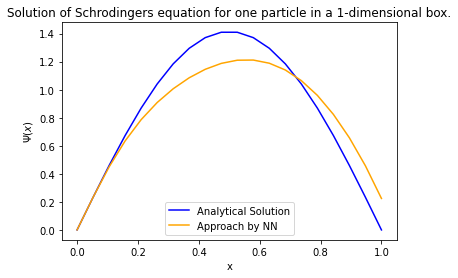

In [9]:
plt.figure()
plt.plot(x_space, y_space,'b', label='Analytical Solution')
plt.plot(x_space, res, 'orange', label='Approach by NN')
plt.title('Solution of Schrodingers equation for one particle in a 1-dimensional box.')
plt.xlabel('x')
plt.ylabel(r'$\Psi(x)$')
plt.legend(loc='best', shadow=False)
plt.show()